In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:

with open('../../output/weights/p_date=2022-08-09-13_47_56/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

6778 records
dict_keys(['loss', 'mae', 'accuracy', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-50_000:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mae
mae = [ v for v in data["mae"] if str(v) != "nan" ]#[-50_000:]
mean_mae = stat.mean(mae)
mae_filtered = { k: v for k, v in enumerate(mae) }# if v <= mean_mae }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-50_000:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ]#[-500:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"]) if str(v) != "nan" }

# Accuracy
accuracy = { k: v for k, v in enumerate(data["accuracy"]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 1000
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average: {percent_list}")
    print(f"Minimum: {min(data.values())}")

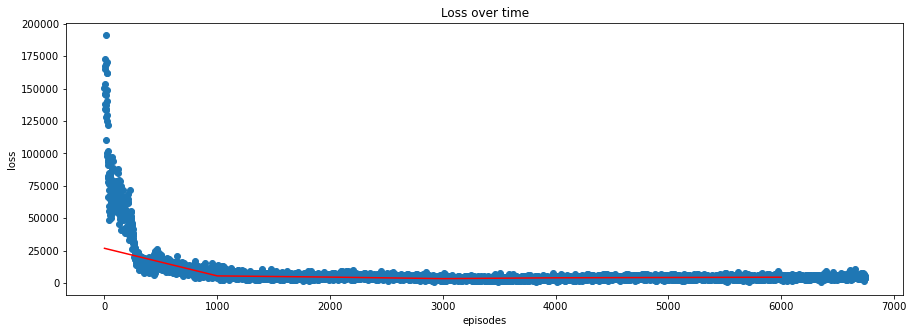

Maximum: 190970.4375
Average: 7737.122546016782
Moving Average: ['-79% (5537.316961724799 | -79%)', '-16% (4621.3695534202125 | -82%)', '-25% (3445.6166879995003 | -87%)', '+18% (4074.4185634311975 | -84%)', '+5% (4313.266398183116 | -83%)', '+5% (4543.801038119882 | -83%)']
Minimum: 492.0694885253906


In [5]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

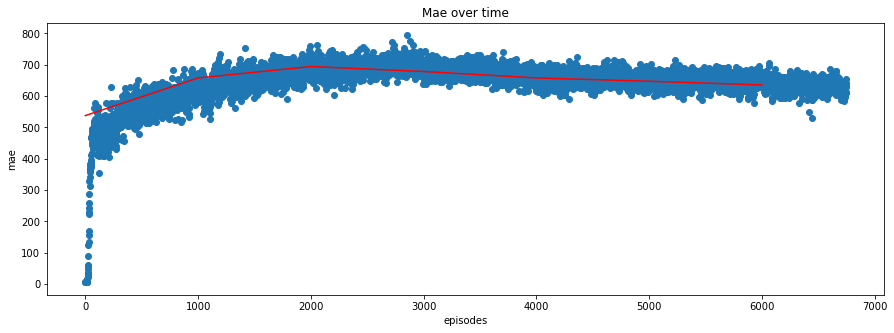

Maximum: 793.7542114257812
Average: 644.493228177524
Moving Average: ['+22% (657.937159398219 | 22%)', '+5% (694.3740423394964 | 29%)', '-2% (678.3850772640445 | 26%)', '-3% (657.9208931937203 | 22%)', '-1% (647.3191899043339 | 20%)', '-1% (635.5084227699647 | 18%)']
Minimum: 5.458293437957764


In [6]:
plot(mae_filtered, "Mae over time", "episodes", "mae")

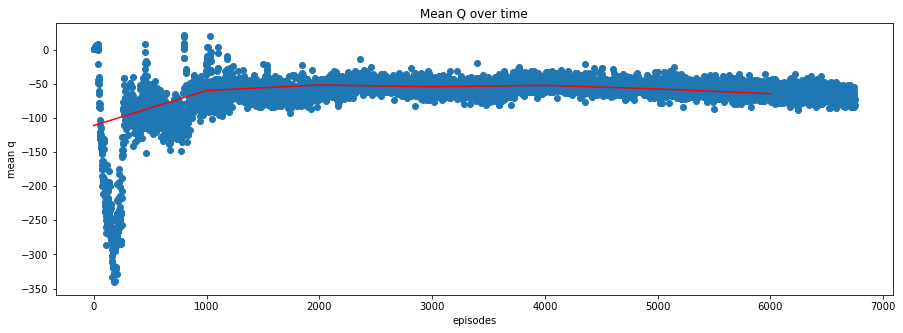

Maximum: 20.813318252563477
Average: -64.62044169065925
Moving Average: []
Minimum: -341.052490234375


In [7]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

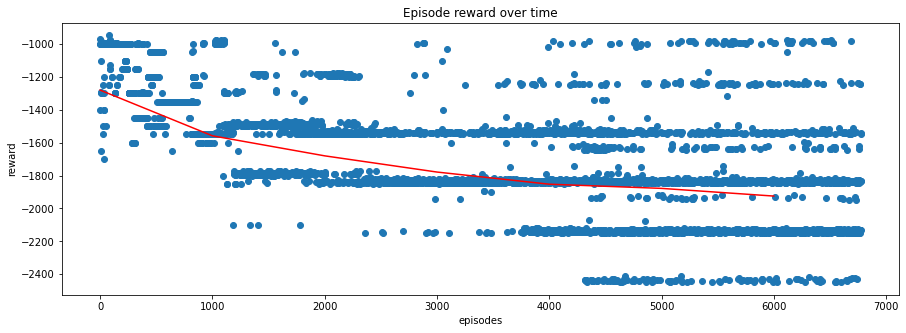

Maximum: -947.0
Average: -1700.0607848923337
Moving Average: []
Minimum: -2450.0


In [8]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

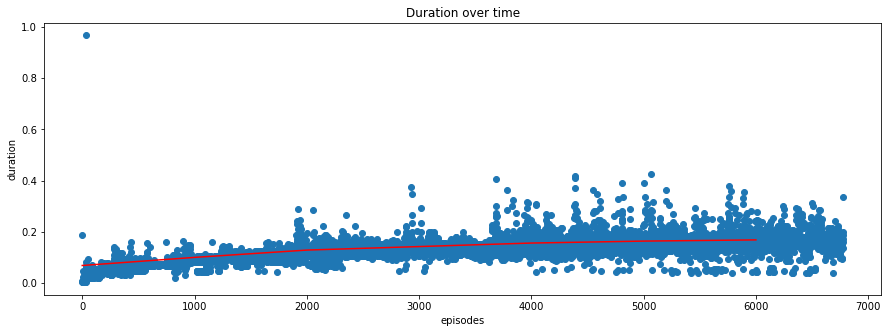

Maximum: 0.9676356000000013
Average: 0.13111968214812567
Moving Average: ['+46% (0.09984951088911104 | 46%)', '+28% (0.1283847827172833 | 88%)', '+10% (0.14215024315684324 | 108%)', '+9% (0.1558933056943035 | 128%)', '+4% (0.16349140589410285 | 139%)', '+2% (0.16820661426735262 | 146%)']
Minimum: 0.001898499999999359


In [9]:
plot(duration, "Duration over time", "episodes", "duration")

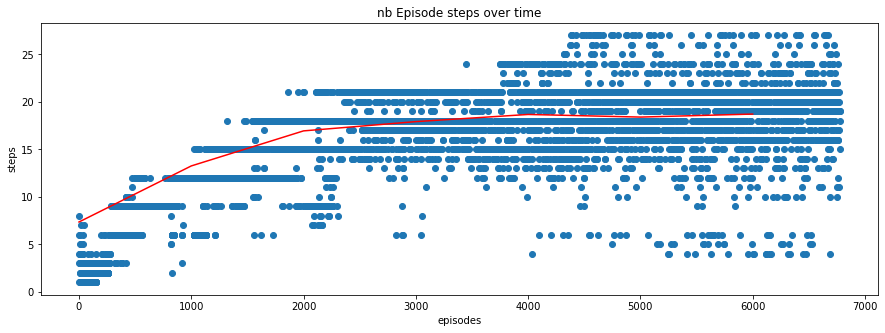

Maximum: 27
Average: 15.804219533785778
Moving Average: ['+80% (13.25974025974026 | 80%)', '+27% (16.948051948051948 | 130%)', '+5% (17.923076923076923 | 143%)', '+4% (18.676323676323676 | 153%)', '-1% (18.4005994005994 | 149%)', '+1% (18.717223650385606 | 154%)']
Minimum: 1


In [10]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

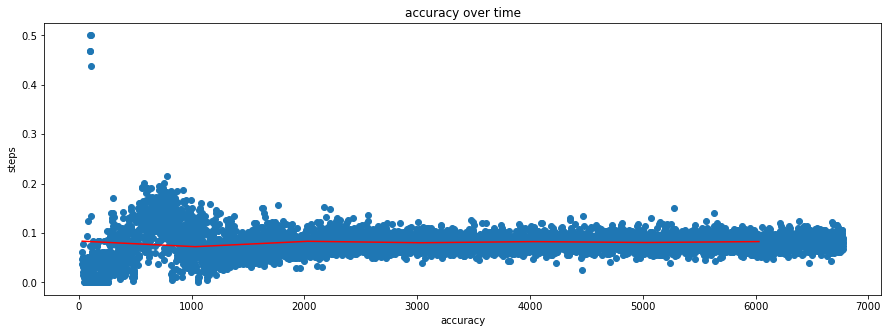

Maximum: 0.5
Average: 0.08074614340485674
Moving Average: ['-13% (0.07240247878978227 | -13%)', '+15% (0.08327280505226328 | 0%)', '-3% (0.08036928492543342 | -3%)', '+2% (0.08262094169795572 | -1%)', '-2% (0.08089819424353041 | -3%)', '+2% (0.08267641447006381 | 0%)']
Minimum: 0.0


In [11]:
plot(accuracy, "accuracy over time", "accuracy", "steps")